# Spam detection model using the vectorized data

To create a spam detection model using the vectorized data, we'll follow these steps:

1. Label the Data: We need labels indicating whether each email is spam or not.
2. Split the Data: Divide the data into training and testing sets to evaluate the model's performance accurately.
3. Train a Model: Use a machine learning algorithm to train a model on the training data. Common choices for text classification include Logistic Regression, Random Forest, Naive Bayes, and Support Vector Machines (SVM).
4. Evaluate the Model: Test the model on the testing set to assess its accuracy, recall, f1-score and confusion matrix

## 1. Loading the e-mail dataset 

In [1]:
import pandas as pd

# Load the dataset
file_path = r"csv/mail.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Subject,Content
0,0,announcing sftp support for backup box,hi \r\n\r\nthanks for using backup box i want...
1,1,what s new big android update skitch sharing...,evernote newsletter march 2012 \r\n\r\ni...
2,2,boxbuzz new onecloud unifies mobile apps with...,\r\n\r\n http app en25 com e es aspx s 1464 ...
3,3,kevin see who you already know on linkedin,\n\n\n\n\n\n\n \n \n\n\n\n \n\ndear kevin \nse...
4,4,3 99 album deals for nirvana jay z soundga...,google play http play google com \n\n ...


# 2. Vectorize the dataset

To vectorize the dataset, we can use techniques like: <br>

 - Bag-of-Words (BoW): Represents text data by counting how many times each word appears.
 - TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words according to their frequency across documents, giving higher importance to less common but potentially more relevant terms.

 We will use TF-IDF, which is commonly used for text processing as it helps in distinguishing more meaningful words from common ones. 


Focusing on the top 1000 terms to simplify the representation.

## 2. Vectorize the dataset with TF-IDF (Term Frequency-Inverse Document Frequency)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features for simplicity

# Fit and transform the 'Content' column
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Content'])

# Create a DataFrame to show the TF-IDF features for the first few rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df



,00,000,01,05,0px,10,100,10012,102,11,...,writing,www,year,years,yet,york,you,your,yourself,youtube
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.121157,0.015350,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.051946,0.122855,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.02228,0.0,0.0,0.000000,...,0.024515,0.000000,0.000000,0.0,0.0,0.051266,0.040902,0.088839,0.0,0.029388
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.154238,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.244195,0.025114,0.0,0.0,0.000000,0.035385,0.035866,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.054336,0.220298,0.0,0.000000
1628,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.109635,0.022225,0.0,0.000000
1629,0.108243,0.0,0.0,0.0,0.0,0.066234,0.00000,0.0,0.0,0.538199,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.025862,0.078639,0.0,0.000000
1630,0.108175,0.0,0.0,0.0,0.0,0.066193,0.00000,0.0,0.0,0.537864,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.025845,0.078590,0.0,0.000000


In [ ]:
import pickle
pkl_filename = 'model/prog8245nlp-tfidf.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

## 2.2. Saving the Vectorize the dataset

In [3]:
import pandas as pd

tfidf_df.to_csv(r'csv/tfidf_vectorized_data.csv', index=False)


In [4]:
import pandas as pd

# Load the vectorized data
file_path = r'csv/tfidf_vectorized_data.csv'
vectorized_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
vectorized_data.head(), vectorized_data.columns


(    00  000   01   05  0px   10      100  10012  102   11  ...   writing   
 0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000    0.0  0.0  0.0  ...  0.000000  \
 1  0.0  0.0  0.0  0.0  0.0  0.0  0.00000    0.0  0.0  0.0  ...  0.000000   
 2  0.0  0.0  0.0  0.0  0.0  0.0  0.02228    0.0  0.0  0.0  ...  0.024515   
 3  0.0  0.0  0.0  0.0  0.0  0.0  0.00000    0.0  0.0  0.0  ...  0.000000   
 4  0.0  0.0  0.0  0.0  0.0  0.0  0.00000    0.0  0.0  0.0  ...  0.000000   
 
         www      year  years  yet      york       you      your  yourself   
 0  0.000000  0.000000    0.0  0.0  0.000000  0.121157  0.015350       0.0  \
 1  0.000000  0.000000    0.0  0.0  0.000000  0.051946  0.122855       0.0   
 2  0.000000  0.000000    0.0  0.0  0.051266  0.040902  0.088839       0.0   
 3  0.000000  0.000000    0.0  0.0  0.000000  0.154238  0.000000       0.0   
 4  0.244195  0.025114    0.0  0.0  0.000000  0.035385  0.035866       0.0   
 
     youtube  
 0  0.000000  
 1  0.000000  
 2  0.029388  
 3  0.

# 3. Label the Data

Labeling data for spam detection. Here are some general guidelines and approaches we might consider:

1. Manual Labeling
If the dataset is not too large, we could manually review each email (or document) and assign a label based on its content:<br>
Spam (1): Emails that are unsolicited and typically trying to sell something, phishing attempts, or contain malicious links.<br>
Not Spam (0): Legitimate emails that are typically personal, business-related, or relevant communications you expect to receive.

2. Using Pre-labeled Data
If manually labeling the dataset is impractical due to its size or complexity, consider using a pre-labeled dataset:<br>
Many public datasets are available for spam detection, such as the Enron Corpus, SpamAssassin Public Corpus, etc.<br>
You can train your model on a pre-labeled dataset and use your unlabeled data as additional testing or real-world application data.

3. Automated Labeling with Rules
For larger datasets, you might develop rules to automatically assign labels based on:<br>
Keywords: Spam often contains specific keywords (e.g., "free", "winner", "urgent", "risk-free").<br>
Sender's Email Address: Emails from certain domains or with suspicious patterns might be more likely to be spam.<br>
Formatting and Presentation: Use of excessive capitalization, multiple font colors, or poor formatting can be indicators of spam.

We are going to use our own manual labeling data 

### 3.1.1. Download from our github

https://github.com/onlyxool/PROG8245NLP


In [5]:
import pandas as pd

# Load the dataset
file_path = r"csv/mail_labeling.csv"
data_label = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
# data_label.head()
data_label




,Unnamed: 0,Subject,Content,label,score
0,0,announcing sftp support for backup box,hi \r\n\r\nthanks for using backup box i want...,Spam,0.779891
1,1,what s new big android update skitch sharing...,evernote newsletter march 2012 \r\n\r\ni...,Spam,0.133800
2,2,boxbuzz new onecloud unifies mobile apps with...,\r\n\r\n http app en25 com e es aspx s 1464 ...,Spam,0.009085
3,3,kevin see who you already know on linkedin,\n\n\n\n\n\n\n \n \n\n\n\n \n\ndear kevin \nse...,Spam,0.651219
4,4,3 99 album deals for nirvana jay z soundga...,google play http play google com \n\n ...,Spam,0.314710
...,...,...,...,...,...
1627,1627,feedback about your support interaction with s...,please type your reply above this line ...,Ham,0.006669
1628,1628,action now join the uber rider loyalty prog...,\r\n ...,Spam,0.607794
1629,1629,shadowsocks com invoice payment confirmation,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Spam,0.705285
1630,1630,shadowsocks com invoice payment confirmation,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Spam,0.705285


### 3.1.2. Vectorize labeling data

How the `tfidf_vectorized_data` already encompasses a comprehensive vectorization of both the Subject and Content, then additional vectorization would not be necessary and could be redundant. 

# 4. Split the Data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert labels to numeric format (1 for Spam, 0 for Not Spam)
data_label['label_numeric'] = (data_label['label'] == 'Spam').astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, data_label['label_numeric'], test_size=0.2, random_state=42)

# 5. Train a Model - Logistic Regression

In [7]:

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, data_label['label_numeric'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [ ]:
pkl_filename = 'model/prog8245nlp.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# 6. Evaluate the model: Logistic Regression

## 6.1. Accuracy, recall, f1-score

In [8]:
from sklearn.metrics import classification_report
import pandas as pd

# Calculate and display accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(report)



Accuracy: 0.7584097859327217

              precision    recall  f1-score   support

           0       0.67      0.05      0.09        81
           1       0.76      0.99      0.86       246

    accuracy                           0.76       327
   macro avg       0.71      0.52      0.48       327
weighted avg       0.74      0.76      0.67       327



Precision: Precision measures the proportion of correctly identified positive cases (spam emails) out of all cases classified as positive. For spam class (Spam), it's 0.76, meaning 76% of the emails classified as spam are actually spam.

Recall: Recall measures the proportion of correctly identified positive cases (spam emails) out of all actual positive cases. For spam class (Spam), it's 0.99, indicating that the model captures 99% of the actual spam emails.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For spam class (Spam), it's 0.86, reflecting a good balance between precision and recall.

Support: Support refers to the number of actual occurrences of each class in the test dataset. For spam class (Spam), there are 246 instances in the test dataset.

The support value for "0" (non-spam emails) in the classification report indicates that out of the 327 emails in the test set, 81 were classified as "0" (non-spam emails). 

## 6.2. Confusion matrix

![Matrix confision](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Z54JgbS4DUwWSknhDCvNTQ.png)



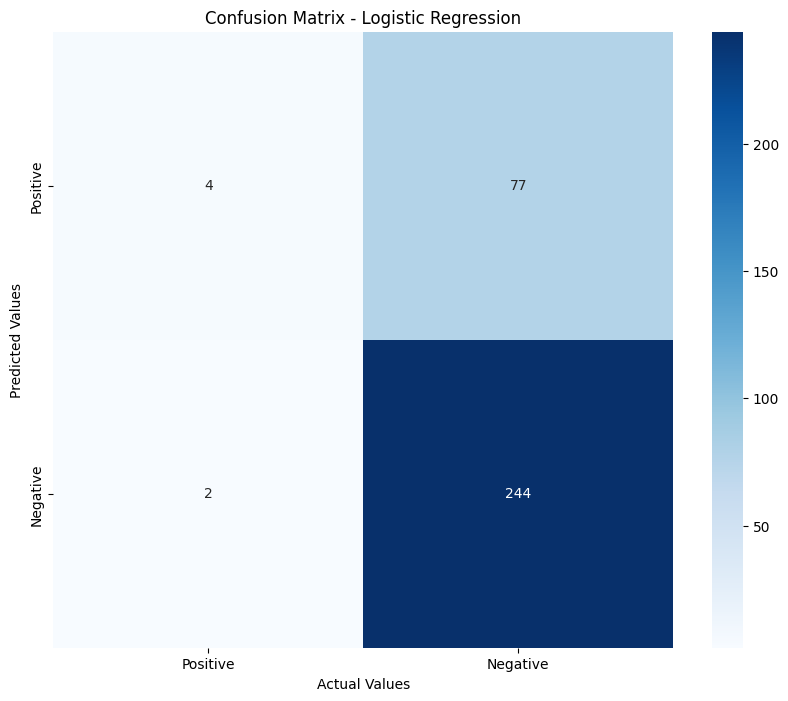

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined and contain the true and predicted labels respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a pandas DataFrame from the confusion matrix for easier plotting
conf_matrix_df_lr = pd.DataFrame(conf_matrix,columns=['Positive', 'Negative'],
                              index=['Positive', 'Negative'])


import seaborn as sns
import matplotlib.pyplot as plt



# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()



Top Left (Purple): True Positive (TP) - The number of positive instances correctly predicted by the model as positive. In this case, there are 4.

Top Right (Blue): False Negative (FN) - The number of positive instances incorrectly predicted by the model as negative. There are 77, indicating these were spam emails that the model failed to identify correctly.

Bottom Left (Purple): False Positive (FP) - The number of negative instances incorrectly predicted by the model as positive. The model has identified 2 such cases.

Bottom Right (Yellow): True Negative (TN) - The number of negative instances correctly predicted by the model as negative. There are 244, indicating these were non-spam emails that the model correctly identified.

# 7. Train a Model - RandomForestClassifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, data_label['label_numeric'], test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

model.fit(X_train, y_train)

# Predict on the testing set
y_pred= model.predict(X_test)


# 8. Evaluate the model: RandomForestClassifier

## 8.1. Accuracy, recall, f1-score

In [11]:
from sklearn.metrics import classification_report
import pandas as pd

# Calculate and display accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(report_rf)



Accuracy: 0.764525993883792

              precision    recall  f1-score   support

           0       0.55      0.28      0.37        81
           1       0.80      0.92      0.85       246

    accuracy                           0.76       327
   macro avg       0.67      0.60      0.61       327
weighted avg       0.73      0.76      0.74       327



## 8.2. Confusion matrix

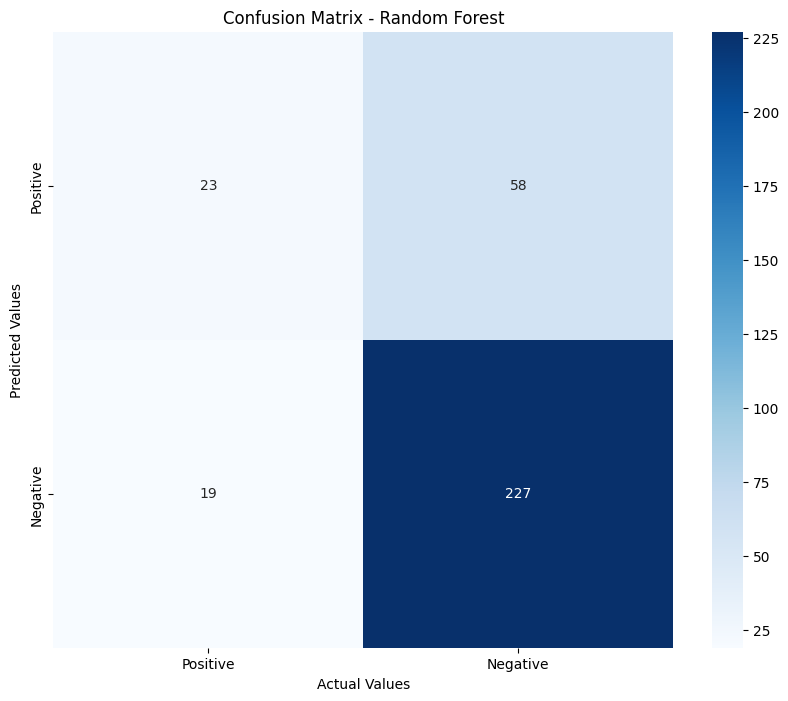

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined and contain the true and predicted labels respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a pandas DataFrame from the confusion matrix for easier plotting
conf_matrix_df_rf = pd.DataFrame(conf_matrix,columns=['Positive', 'Negative'],
                              index=['Positive', 'Negative'])


import seaborn as sns
import matplotlib.pyplot as plt



# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()


- Top-left square (True Positives, TP): The number of positive instances correctly predicted by the model (23).
- Top-right square (False Negatives, FN): The number of positive instances incorrectly predicted as negative by the model (58).
- Bottom-left square (False Positives, FP): The number of negative instances incorrectly predicted as positive by the model (19).
- Bottom-right square (True Negatives, TN): The number of negative instances correctly predicted by the model (227).

# 10.Which confusion matrix is better?

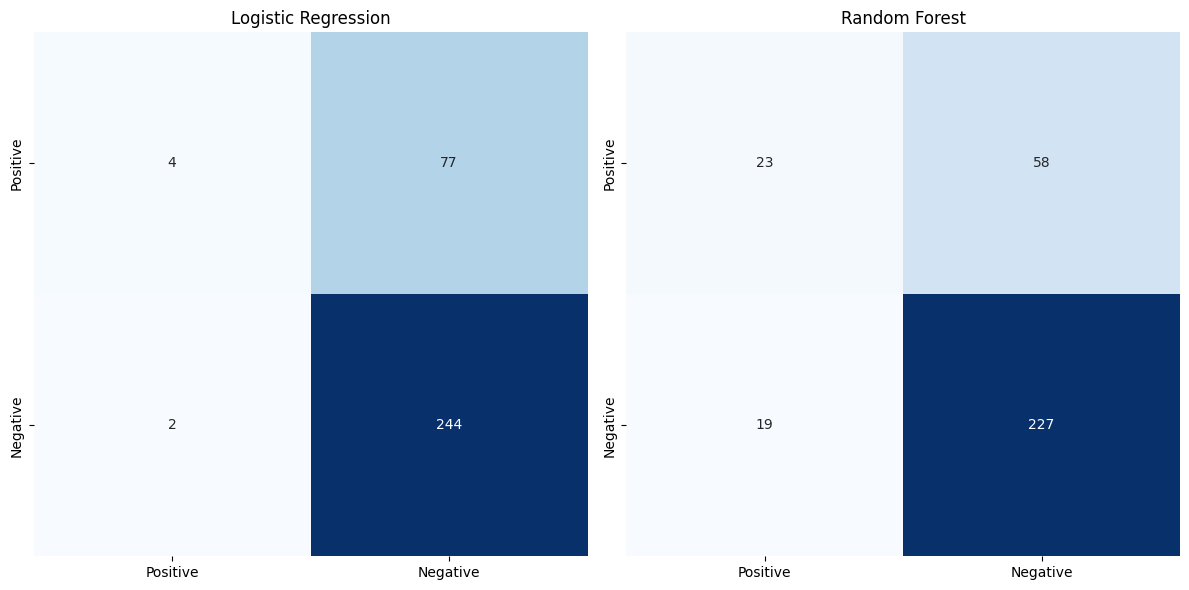

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the confusion matrices conf_matrix_lr and conf_matrix_rf

# Convert confusion matrices to pandas DataFrames
conf_matrix_df_lr = pd.DataFrame(conf_matrix_df_lr, columns=['Positive', 'Negative'], index=['Positive', 'Negative'])
conf_matrix_df_rf = pd.DataFrame(conf_matrix_df_rf, columns=['Positive', 'Negative'], index=['Positive', 'Negative'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for logistic regression
sns.heatmap(conf_matrix_df_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_title('Logistic Regression')

# Plot confusion matrix for random forest
sns.heatmap(conf_matrix_df_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
axs[1].set_title('Random Forest')

plt.tight_layout()
plt.show()


For the Logistic Regression model:

- True Positives (TP): 4
- False Negatives (FN): 77
- False Positives (FP): 2
- True Negatives (TN): 244

For the Random Forest model:

- True Positives (TP): 23
- False Negatives (FN): 58
- False Positives (FP): 19
- True Negatives (TN): 227

In [14]:
print(f"Logistic Regression:\n {report}")
print(f"Randon Forest:\n {report_rf}")

Logistic Regression:
               precision    recall  f1-score   support

           0       0.67      0.05      0.09        81
           1       0.76      0.99      0.86       246

    accuracy                           0.76       327
   macro avg       0.71      0.52      0.48       327
weighted avg       0.74      0.76      0.67       327

Randon Forest:
               precision    recall  f1-score   support

           0       0.55      0.28      0.37        81
           1       0.80      0.92      0.85       246

    accuracy                           0.76       327
   macro avg       0.67      0.60      0.61       327
weighted avg       0.73      0.76      0.74       327



- Precision: Logistic Regression is more precise than Random Forest, meaning it has a lower rate of false positives.
- Recall: Random Forest has a higher recall than Logistic Regression, meaning it is better at identifying positive instances.
- Accuracy: Both models have similar accuracy, with Random Forest being slightly higher.
- F1 Score: Random Forest has a much higher F1 Score than Logistic Regression, indicating a better balance between precision and recall.

Considering these factors, the Random Forest model seems to perform better overall.<br>
It has significantly better recall and F1 score, indicating that it is more effective at classifying positive instances without compromising too much on precision.<br> 
The slightly higher accuracy of the Random Forest model also supports this conclusion.